# Machine Learning Foundation

## Course 5, Part e: CNN DEMO

## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [1]:
import keras
import numpy as np
#from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential # For model initiation
from keras.layers import Dense, Dropout, Activation, Flatten 
# Dense to create fully connected layer # Drop out for regularization
# Flatten is important when we want to move from convolutional layer to dense layer 
from keras.layers import Conv2D, MaxPooling2D # To build convolutional layers and pooling layers
import matplotlib.pyplot as plt

In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 14s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape # image number 444
# It is 32 times 32 matrices with 9 elements per matrix.

(32, 32, 3)

[9]


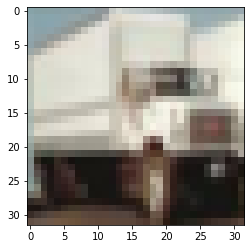

In [4]:
## Let's look at one of the images

print(y_train[444]) # print the class of the image
plt.imshow(x_train[444]); # print the image

[2]


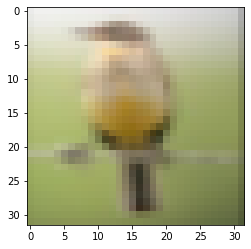

In [5]:
## Let's look at another image

print(y_train[144]) # class 2 is bird.
plt.imshow(x_train[144]);


In [6]:
num_classes = 10 # defined how many classes we have 

y_train = keras.utils.to_categorical(y_train, num_classes) # encoding to pythonic array
y_test = keras.utils.to_categorical(y_test, num_classes) # encoding to pythonic array

In [7]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
y_train[144] # should give us a 1 in the 2nd pythonic position

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Min-max scaling.
x_test /= 255

In [10]:
type(x_train) # it stays an array

numpy.ndarray

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output. [Number of kernels]
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer
- `padding`: if padding means valid then it means that we are not having any paddings.

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [11]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', # We are adding paddings
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2))) # take the max of each distinct batck and reduce it
model_1.add(Dropout(0.25)) # Regularizarion

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten()) # moving from 3 dimensional object to 1 dimensional object.
model_1.add(Dense(512)) 
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes)) # adding final dense layer, so our output is equal to number of classes we have.
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     


2022-07-30 14:11:20.943476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 512)               147968    
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
          

We still have 181K parameters, even though this is a "small" model.


In [12]:
# compiling and fitting
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy', # categorical cross entropy because it is a multiclass classification
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size, # how many rows [image] per iteration
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.7376 - accuracy: 0.3643 - val_loss: 1.4504 - val_accuracy: 0.4871
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4504 - accuracy: 0.4784 - val_loss: 1.3511 - val_accuracy: 0.5223
Epoch 3/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3505 - accuracy: 0.5141 - val_loss: 1.2858 - val_accuracy: 0.5401
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2821 - accuracy: 0.5433 - val_loss: 1.2314 - val_accuracy: 0.5621
Epoch 5/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2345 - accuracy: 0.5611 - val_loss: 1.1964 - val_accuracy: 0.5740
Epoch 6/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2023 - accuracy: 0.5775 - val_loss: 1.1513 - val_accuracy: 0.5913
Epoch 7/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1727 - accuracy: 0.5884 - val_loss: 1.1002 -

In [13]:
# predict the probability:
model_1_proba = model_1.predict(x_test)
# Predict the class
model_1_class = np.argmax(model_1.predict(x_test), axis=1)
model_1_class

313/313 [==============================] - 2s 5ms/step


array([3, 1, 0, ..., 5, 1, 7])

In [14]:
# In order to perform accuracy metrics, let us convert y_test into integers
y_test_int = np.argmax(y_test, axis = 1)
y_test_int

array([3, 8, 8, ..., 5, 1, 7])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_int, model_1_class)

0.6104

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [16]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same', # first time with padding
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3))) # second time without padding
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [17]:
## Check number of parameters

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [18]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [19]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 175s 111ms/step - loss: 1.5693 - accuracy: 0.4280 - val_loss: 1.3162 - val_accuracy: 0.5388
Epoch 2/5
1563/1563 [==============================] - 217s 139ms/step - loss: 1.1912 - accuracy: 0.5779 - val_loss: 1.1966 - val_accuracy: 0.5831
Epoch 3/5
1563/1563 [==============================] - 255s 163ms/step - loss: 1.0197 - accuracy: 0.6436 - val_loss: 0.8806 - val_accuracy: 0.6906
Epoch 4/5
1563/1563 [==============================] - 210s 134ms/step - loss: 0.9187 - accuracy: 0.6800 - val_loss: 0.9601 - val_accuracy: 0.6646
Epoch 5/5
1563/1563 [==============================] - 209s 133ms/step - loss: 0.8630 - accuracy: 0.7026 - val_loss: 0.8269 - val_accuracy: 0.7149


In [20]:
# predict the probability:
model_2_proba = model_2.predict(x_test)
# Predict the class
model_2_class = np.argmax(model_2.predict(x_test),axis = 1)
model_2_class

313/313 [==============================] - 7s 22ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [21]:
y_test2_int = np.argmax(y_test, axis = 1)
y_test2_int

array([3, 8, 8, ..., 5, 1, 7])

In [22]:
accuracy_score(y_test2_int, model_2_class)

0.7149

---
### Machine Learning Foundation (C) 2020 IBM Corporation